In [1]:
%matplotlib inline

In [2]:
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

In [3]:
IMAGE_PATH = 'inputs/kimata.jpg'
IMAGE = plt.imread(IMAGE_PATH)

#Draw a blank canvas.
canvas = np.zeros((720, 1280, 3), dtype = 'uint8')

In [4]:
IMAGE.shape

(720, 1280, 3)

In [5]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


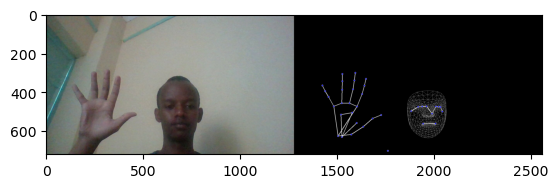

In [6]:
with mp_holistic.Holistic(min_detection_confidence=0.5, 
                          min_tracking_confidence=0.5) as holistic:
    

    results = holistic.process(cv2.cvtColor(IMAGE, cv2.COLOR_BGR2RGB))
    
    #Draw pose landmarks.
    annotated_image = canvas.copy()
    
    #Right hand landmarks.`
    mp_drawing.draw_landmarks(annotated_image, results.right_hand_landmarks, 
                              mp_holistic.HAND_CONNECTIONS)
    
    #Face landmarks.
    mp_drawing.draw_landmarks(annotated_image, results.face_landmarks, 
                              mp_holistic.FACEMESH_TESSELATION,
                              landmark_drawing_spec = None, 
                              connection_drawing_spec = mp_drawing_styles.get_default_face_mesh_tesselation_style())
    
    #Pose landmarks.
    mp_drawing.draw_landmarks(annotated_image, results.pose_landmarks,
                              mp_holistic.POSE_CONNECTIONS)
    
    #Horizontal concatenate images.
    concat_img = cv2.hconcat([IMAGE, annotated_image])
    # print(IMAGE.shape, annotated_image.shape)
    
    plt.imshow(concat_img)

In [7]:
#Draw a blank canvas.
canvas_video = np.zeros((480, 640, 3), dtype = 'uint8')

In [8]:
#Perform real-time inference.
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    
    if not ret:
        print('No frames found.')
        break
    
    IMAGE = frame.copy()
    
    with mp_holistic.Holistic(min_detection_confidence=0.5, 
                          min_tracking_confidence=0.5) as holistic:

        results = holistic.process(cv2.cvtColor(IMAGE, cv2.COLOR_BGR2RGB))

        #Draw pose landmarks.
        annotated_image = canvas_video.copy()

        #Right hand landmarks.`
        mp_drawing.draw_landmarks(annotated_image, results.right_hand_landmarks, 
                                  mp_holistic.HAND_CONNECTIONS)
        #Left hand landmarks.
        mp_drawing.draw_landmarks(annotated_image, results.left_hand_landmarks, 
                                  mp_holistic.HAND_CONNECTIONS)
        
        #Pose landmarks.
        mp_drawing.draw_landmarks(annotated_image, results.pose_landmarks, 
                                  mp_holistic.POSE_CONNECTIONS)
        
        #Face landmarks.
        mp_drawing.draw_landmarks(annotated_image, results.face_landmarks, 
                                  mp_holistic.FACEMESH_TESSELATION,
                                  landmark_drawing_spec = None, 
                                  connection_drawing_spec = mp_drawing_styles.get_default_face_mesh_tesselation_style())

 
        #Horizontal concatenate images.
        concat_img = cv2.hconcat([IMAGE, annotated_image])
        # print(IMAGE.shape, annotated_image.shape)

        cv2.imshow('image', concat_img)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        
cap.release()
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x2336870) is not the object's thread (0x220caa0).
Cannot move to target thread (0x2336870)

QObject::moveToThread: Current thread (0x2336870) is not the object's thread (0x220caa0).
Cannot move to target thread (0x2336870)

QObject::moveToThread: Current thread (0x2336870) is not the object's thread (0x220caa0).
Cannot move to target thread (0x2336870)

QObject::moveToThread: Current thread (0x2336870) is not the object's thread (0x220caa0).
Cannot move to target thread (0x2336870)

QObject::moveToThread: Current thread (0x2336870) is not the object's thread (0x220caa0).
Cannot move to target thread (0x2336870)

QObject::moveToThread: Current thread (0x2336870) is not the object's thread (0x220caa0).
Cannot move to target thread (0x2336870)

QObject::moveToThread: Current thread (0x2336870) is not the object's thread (0x220caa0).
Cannot move to target thread (0x2336870)

QObject::moveToThread: Current thread (0x2336870) is not the object's thread

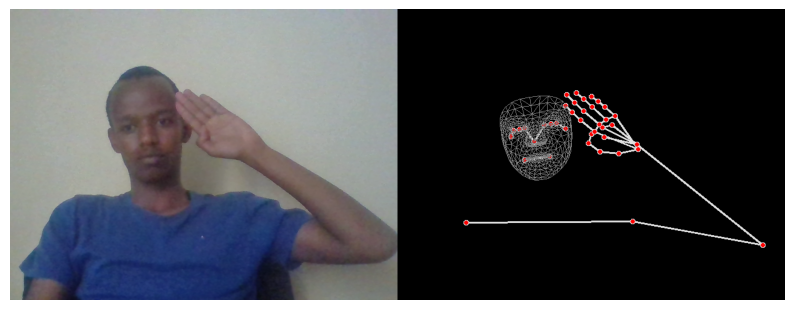

In [9]:
rgb_img = cv2.cvtColor(concat_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (10, 5))
plt.imshow(rgb_img)
plt.axis('off')
plt.show()